In [14]:
%matplotlib inline

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in data
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [3]:
# combine train and test to ease transformations
combined = train.append(test, ignore_index=True)
combined.drop(['Id', 'SalePrice'], axis=1, inplace=True)

NameError: name 'corrmat' is not defined

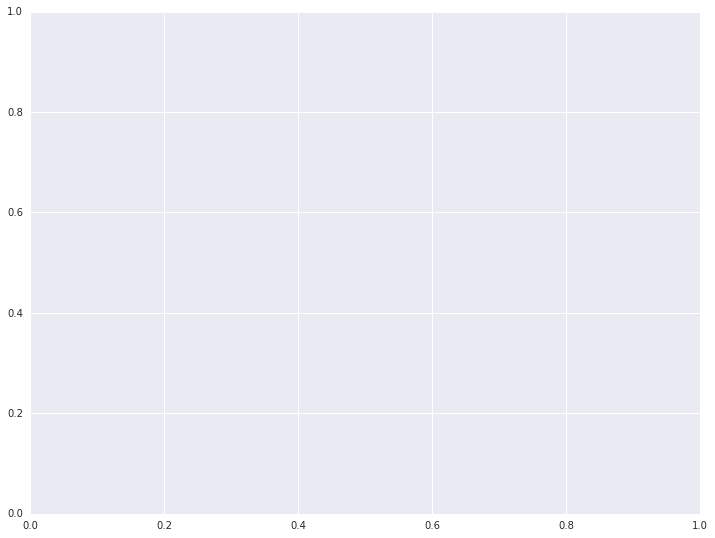

In [25]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

## Use matplotlib directly to emphasize known networks
#networks = corrmat.columns.get_level_values("network")
#for i, network in enumerate(networks):
#    if i and network != networks[i - 1]:
#        ax.axhline(len(networks) - i, c="w")
#        ax.axvline(i, c="w")
f.tight_layout()

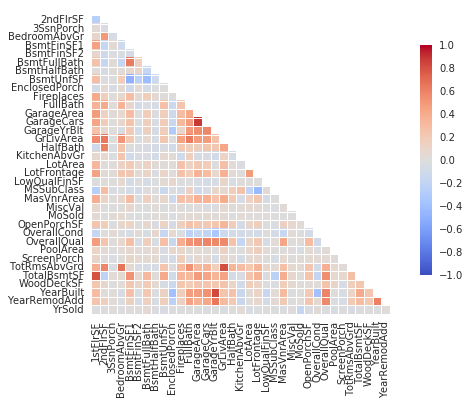

In [28]:
sns.corrplot(combined, annot=False, diag_names=False)

/Users/dave/.pyenv/versions/anaconda-2.4.0/lib/python2.7/site-packages/seaborn/linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/Users/dave/.pyenv/versions/anaconda-2.4.0/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/dave/.pyenv/versions/anaconda-2.4.0/lib/python2.7/site-packages/seaborn/linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


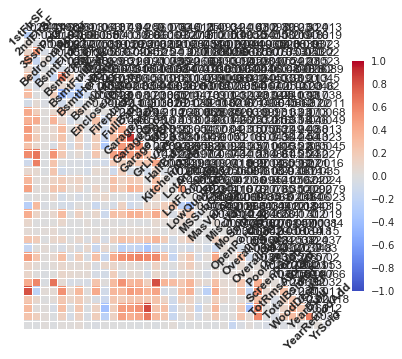

In [22]:
sbn.corrplot(combined)

In [21]:
# TotalSF
help(sbn.corrplot)

Help on function corrplot in module seaborn.linearmodels:

corrplot(data, names=None, annot=True, sig_stars=True, sig_tail='both', sig_corr=True, cmap=None, cmap_range=None, cbar=True, diag_names=True, method=None, ax=None, **kwargs)
    Plot a correlation matrix with colormap and r values.
    
    NOTE: This function is deprecated in favor of :func:`heatmap` and will
    be removed in a forthcoming release.
    
    Parameters
    ----------
    data : Dataframe or nobs x nvars array
        Rectangular input data with variabes in the columns.
    names : sequence of strings
        Names to associate with variables if `data` is not a DataFrame.
    annot : bool
        Whether to annotate the upper triangle with correlation coefficients.
    sig_stars : bool
        If True, get significance with permutation test and denote with stars.
    sig_tail : both | upper | lower
        Direction for significance test. Also controls the default colorbar.
    sig_corr : bool
        If True,

In [7]:
row = combined.iloc[0,:]

In [17]:
combined.LotArea

AttributeError: 'Series' object has no attribute 'log'

In [5]:
for c in combined.iloc[0,:]:
    

856
854
0
nan
3
1Fam
TA
No
706.0
0.0
GLQ
Unf
1.0
0.0
Gd
150.0
Y
Norm
Norm
SBrkr
0
TA
Gd
VinylSd
VinylSd
nan
nan
0
PConc
2
Typ
548.0
2.0
TA
RFn
TA
Attchd
2003.0
1710
1
GasA
Ex
2Story
1
Gd
Lvl
Gtl
8450
Inside
65.0
Reg
0
60
RL
196.0
BrkFace
nan
0
2
CollgCr
61
5
7
Y
0
nan
CompShg
Gable
Normal
WD
0
Pave
8
856.0
AllPub
0
2003
2003
2008


In [ ]:


    for col in combined.columns:
        if combined[col].dtype == 'object':
            combined[col] = combined[col].factorize()[0]
        else:
            combined[col] = combined[col].fillna(-99)

    X = combined.values[:train.shape[0], :]
    X_submission = combined.values[train.shape[0]:, :]

    ids_submission = test['Id'].values
    y = train['SalePrice'].values

    return y, X, X_submission, ids_submission